# **Tugas Analisis PySpark (case movielens dataset)**

## **Anggota Kelompok:**
1.   Subkhan Masudi (5027221044)

In [1]:
!pip install findspark
!pip install pyspark

import findspark
findspark.init()

# Creating a SparkSession: A SparkSession is the entry point for using the PySpark DataFrame and SQL API.
# To create a SparkSession, use the following code
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PySpark 101 Exercises").getOrCreate()

# Get version details
print(spark.version)

You should consider upgrading via the 'C:\Users\akutu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\akutu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.

# **Inisialisasi Dataset**

In [2]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

--2024-10-14 12:56:50--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  19.8MB/s    in 0.2s    

2024-10-14 12:56:50 (19.8 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

In [3]:
ratings_df = spark.read.csv("ml-100k/u.data", sep="\t", header=None, schema="user_id INT, item_id INT, rating INT, timestamp INT")
movies_df = spark.read.csv("ml-100k/u.item", sep="|", header=None, encoding="ISO-8859-1",
                           schema="movie_id INT, movie_title STRING, release_date STRING, video_release_date STRING, imdb_url STRING, unknown INT, Action INT, Adventure INT, Animation INT, Children INT, Comedy INT, Crime INT, Documentary INT, Drama INT, Fantasy INT, FilmNoir INT, Horror INT, Musical INT, Mystery INT, Romance INT, SciFi INT, Thriller INT, War INT, Western INT")


# **Soal Nomor 1**
Hitung rata-rata rating untuk setiap film (MovieID). Urutkan hasilnya dari rating tertinggi ke terendah.

**Pertanyaan**: Film mana yang memiliki rata-rata rating tertinggi? Berapa nilai rata-rata tersebut?

In [12]:
# Hitung rata-rata rating per film
avg_ratings_df = ratings_df.groupBy("item_id").agg({"rating": "avg"}).withColumnRenamed("avg(rating)", "avg_rating")

# Gabungkan dengan movie titles
avg_ratings_df = avg_ratings_df.join(movies_df, avg_ratings_df.item_id == movies_df.movie_id).select("movie_title", "avg_rating")

# Urutkan dari rating tertinggi ke terendah
avg_ratings_df.orderBy("avg_rating", ascending=False).show(20)

print(f"Film yang memiliki rata-rata rating tertinggi sebesar 5.0 adalah: ")

# Filter film yang memiliki rata-rata rating 5.0
top_rated_5_df = avg_ratings_df.filter(avg_ratings_df.avg_rating == 5.0)

# Tampilkan seluruh daftar film dengan rata-rata rating 5.0
top_rated_5_df.select("movie_title").show(truncate=False)


+--------------------+-----------------+
|         movie_title|       avg_rating|
+--------------------+-----------------+
|Saint of Fort Was...|              5.0|
|Entertaining Ange...|              5.0|
|Santa with Muscle...|              5.0|
|Marlene Dietrich:...|              5.0|
|Someone Else's Am...|              5.0|
|They Made Me a Cr...|              5.0|
|  Prefontaine (1997)|              5.0|
|     Star Kid (1997)|              5.0|
|Aiqing wansui (1994)|              5.0|
|Great Day in Harl...|              5.0|
|Pather Panchali (...|            4.625|
|Some Mother's Son...|              4.5|
|         Anna (1996)|              4.5|
|      Everest (1998)|              4.5|
|Maya Lin: A Stron...|              4.5|
|Close Shave, A (1...|4.491071428571429|
|Schindler's List ...|4.466442953020135|
|Wrong Trousers, T...|4.466101694915254|
|   Casablanca (1942)| 4.45679012345679|
|Wallace & Gromit:...|4.447761194029851|
+--------------------+-----------------+
only showing top

# **Soal Nomor 2**
Hitung berapa kali setiap film diberi rating oleh pengguna.

**Pertanyaan**: Film mana yang paling banyak menerima rating dari pengguna? Berapa kali film tersebut dirating?



In [15]:
# Hitung jumlah rating per film
rating_counts_df = ratings_df.groupBy("item_id").count().withColumnRenamed("count", "rating_count")

# Gabungkan dengan movie titles
rating_counts_df = rating_counts_df.join(movies_df, rating_counts_df.item_id == movies_df.movie_id).select("movie_title", "rating_count")

# Urutkan dari jumlah rating terbanyak ke paling sedikit dan ambil film dengan jumlah rating terbanyak
most_rated_movie = rating_counts_df.orderBy("rating_count", ascending=False).first()

# Tampilkan film dengan jumlah rating terbanyak dan jumlah ratingnya
print(f"Film dengan jumlah rating terbanyak adalah {most_rated_movie['movie_title']}, dengan total {most_rated_movie['rating_count']} rating")


Film dengan jumlah rating terbanyak adalah Star Wars (1977), dengan total 583 rating


# **Soal Nomor 3**
Analisis distribusi rating di seluruh dataset. Hitung berapa banyak rating yang memiliki nilai 1, 2, 3, 4, dan 5.

**Pertanyaan**: Berapa banyak pengguna memberikan rating 5? Dan berapa banyak yang memberikan rating 1?

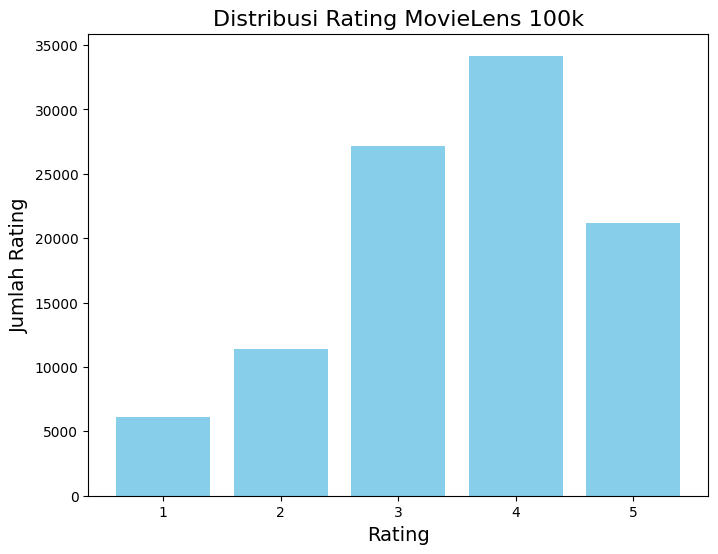

+------+------------+
|rating|rating_count|
+------+------------+
|     1|        6110|
|     2|       11370|
|     3|       27145|
|     4|       34174|
|     5|       21201|
+------+------------+

Jumlah pengguna yang memberikan rating 5: 21201
Jumlah pengguna yang memberikan rating 1: 6110


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi DataFrame PySpark ke Pandas DataFrame
rating_distribution_pd = rating_distribution_df.toPandas()

# Plot distribusi rating menggunakan Matplotlib
plt.figure(figsize=(8,6))
plt.bar(rating_distribution_pd['rating'], rating_distribution_pd['rating_count'], color='skyblue')

# Tambahkan judul dan label sumbu
plt.title("Distribusi Rating MovieLens 100k", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Jumlah Rating", fontsize=14)

# Tampilkan plot
plt.xticks([1, 2, 3, 4, 5])
plt.show()


# Hitung distribusi rating
rating_distribution_df = ratings_df.groupBy("rating").count().withColumnRenamed("count", "rating_count")

# Urutkan hasil distribusi rating
rating_distribution_df = rating_distribution_df.orderBy("rating")

# Tampilkan distribusi rating
rating_distribution_df.show()

# Ambil jumlah pengguna yang memberikan rating 5 dan rating 1
rating_5_count = rating_distribution_df.filter(rating_distribution_df.rating == 5).select("rating_count").first()["rating_count"]
rating_1_count = rating_distribution_df.filter(rating_distribution_df.rating == 1).select("rating_count").first()["rating_count"]

# Tampilkan hasilnya
print(f"Jumlah pengguna yang memberikan rating 5: {rating_5_count}")
print(f"Jumlah pengguna yang memberikan rating 1: {rating_1_count}")


# **Soal Nomor 4**
Temukan pengguna (UserID) yang memberikan paling banyak rating.

**Pertanyaan**: Siapakah pengguna paling aktif, dan berapa banyak rating yang telah diberikan?

In [24]:
# Membaca data pengguna
users_df = spark.read.csv("ml-100k/u.user", sep="|", header=None, encoding="ISO-8859-1",
                          schema="user_id INT, age INT, gender STRING, occupation STRING, zip_code STRING")

# Hitung jumlah rating yang diberikan oleh setiap pengguna
user_rating_counts_df = ratings_df.groupBy("user_id").count().withColumnRenamed("count", "rating_count")

# Urutkan dari jumlah rating terbanyak ke paling sedikit dan ambil pengguna paling aktif
most_active_user = user_rating_counts_df.orderBy("rating_count", ascending=False).first()

# Ambil UserID pengguna paling aktif
most_active_user_id = most_active_user["user_id"]

# Gabungkan dengan data pengguna untuk mendapatkan detail lainnya
user_details = users_df.filter(users_df.user_id == most_active_user_id).first()

# Tampilkan detail pengguna paling aktif
print(f"Pengguna paling aktif: UserID {most_active_user_id}, dengan {most_active_user['rating_count']} rating")
print(f"Detail Pengguna: ")
print(f"- Gender: {user_details['gender']}")
print(f"- Usia: {user_details['age']}")
print(f"- Pekerjaan: {user_details['occupation']}")


Pengguna paling aktif: UserID 405, dengan 737 rating
Detail Pengguna: 
- Gender: F
- Usia: 22
- Pekerjaan: healthcare


# **ANALISIS RATING BERDASARKAN FILM**

# **Soal Nomor 1**
Berdasarkan jumlah rating yang diterima, tampilkan 10 film yang paling populer.

**Pertanyaan**: Sebutkan 10 film dengan jumlah rating terbanyak.

In [26]:
# Hitung jumlah rating yang diterima setiap film
popular_movies_df = ratings_df.groupBy("item_id").count().withColumnRenamed("count", "rating_count")

# Gabungkan dengan judul film
popular_movies_df = popular_movies_df.join(movies_df, popular_movies_df.item_id == movies_df.movie_id) \
    .select("movie_title", "rating_count")

# Urutkan berdasarkan jumlah rating dari yang terbanyak dan ambil 10 film teratas
top_10_popular_movies = popular_movies_df.orderBy("rating_count", ascending=False).limit(10)

print(f"Film terpopuler dengan jumlah rating terbanyak adalah:")

# Tampilkan hasilnya
top_10_popular_movies.show()


Film terpopuler dengan jumlah rating terbanyak adalah:
+--------------------+------------+
|         movie_title|rating_count|
+--------------------+------------+
|    Star Wars (1977)|         583|
|      Contact (1997)|         509|
|        Fargo (1996)|         508|
|Return of the Jed...|         507|
|    Liar Liar (1997)|         485|
|English Patient, ...|         481|
|       Scream (1996)|         478|
|    Toy Story (1995)|         452|
|Air Force One (1997)|         431|
|Independence Day ...|         429|
+--------------------+------------+



# **Soal Nomor 2**
Tampilkan 10 film dengan rating rata-rata tertinggi (film yang paling disukai).

**Pertanyaan**: Sebutkan 10 film dengan rating tertinggi, dan berapa rata-rata ratingnya?

In [28]:
# Hitung rata-rata rating per film
avg_ratings_df = ratings_df.groupBy("item_id").agg({"rating": "avg"}).withColumnRenamed("avg(rating)", "avg_rating")

# Gabungkan dengan movie titles
avg_ratings_df = avg_ratings_df.join(movies_df, avg_ratings_df.item_id == movies_df.movie_id).select("movie_title", "avg_rating")

# Urutkan dari rating tertinggi ke terendah
avg_ratings_df.orderBy("avg_rating", ascending=False).show(20)

print(f"10 Film yang memiliki rata-rata rating tertinggi sebesar 5.0 adalah: ")

# Filter film yang memiliki rata-rata rating 5.0
top_rated_5_df = avg_ratings_df.filter(avg_ratings_df.avg_rating == 5.0)

# Tampilkan seluruh daftar film dengan rata-rata rating 5.0
top_rated_5_df.select("movie_title").show(truncate=False)


+--------------------+-----------------+
|         movie_title|       avg_rating|
+--------------------+-----------------+
|Saint of Fort Was...|              5.0|
|Entertaining Ange...|              5.0|
|Santa with Muscle...|              5.0|
|Marlene Dietrich:...|              5.0|
|Someone Else's Am...|              5.0|
|They Made Me a Cr...|              5.0|
|  Prefontaine (1997)|              5.0|
|     Star Kid (1997)|              5.0|
|Aiqing wansui (1994)|              5.0|
|Great Day in Harl...|              5.0|
|Pather Panchali (...|            4.625|
|Some Mother's Son...|              4.5|
|         Anna (1996)|              4.5|
|      Everest (1998)|              4.5|
|Maya Lin: A Stron...|              4.5|
|Close Shave, A (1...|4.491071428571429|
|Schindler's List ...|4.466442953020135|
|Wrong Trousers, T...|4.466101694915254|
|   Casablanca (1942)| 4.45679012345679|
|Wallace & Gromit:...|4.447761194029851|
+--------------------+-----------------+
only showing top

# **Soal Nomor 3**
Temukan film yang hanya mendapatkan satu rating.

**Pertanyaan**: Berapa banyak film yang hanya mendapat satu rating?

In [31]:
# Hitung jumlah rating yang diterima setiap film
single_rating_movies_df = ratings_df.groupBy("item_id").count().withColumnRenamed("count", "rating_count")

# Filter film yang hanya mendapatkan satu rating
single_rating_movies = single_rating_movies_df.filter(single_rating_movies_df.rating_count == 1)

# Gabungkan dengan judul film
single_rating_movies_with_titles = single_rating_movies.join(movies_df, single_rating_movies.item_id == movies_df.movie_id) \
    .select("movie_title")

print(f"Jumlah film yang hanya mendapatkan satu rating: {single_rating_movies_count}")

# Tampilkan hasil
single_rating_movies_with_titles.show()


Jumlah film yang hanya mendapatkan satu rating: 141
+--------------------+
|         movie_title|
+--------------------+
|     Liebelei (1933)|
|Butcher Boy, The ...|
|Three Lives and O...|
|    Sleepover (1995)|
|Stefano Quantesto...|
|Butcher Boy, The ...|
|King of New York ...|
|Shadow of Angels ...|
|Paris Was a Woman...|
|I Don't Want to T...|
|Entertaining Ange...|
|Tigrero: A Film T...|
|Object of My Affe...|
|Sunchaser, The (1...|
|     Power 98 (1995)|
|Marlene Dietrich:...|
| Mad Dog Time (1996)|
|Butterfly Kiss (1...|
|        Cyclo (1995)|
|Pharaoh's Army (1...|
+--------------------+
only showing top 20 rows

